In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas 
raw_housing_data=pandas.read_csv("/kaggle/input/regression-model/1. Regression - Module - (Housing Prices).csv")
raw_housing_data

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14-May-17,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15-Feb-16,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14-Jun-17,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15-Jan-16,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


In [3]:
raw_housing_data.dtypes

ID                                             int64
Date House was Sold                           object
Sale Price                                   float64
No of Bedrooms                                 int64
No of Bathrooms                              float64
Flat Area (in Sqft)                          float64
Lot Area (in Sqft)                           float64
No of Floors                                 float64
Waterfront View                               object
No of Times Visited                           object
Condition of the House                        object
Overall Grade                                  int64
Area of the House from Basement (in Sqft)    float64
Basement Area (in Sqft)                        int64
Age of House (in Years)                        int64
Renovated Year                                 int64
Zipcode                                      float64
Latitude                                     float64
Longitude                                    f

In [4]:
raw_housing_data.head(10)

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14-Oct-17,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14-Dec-17,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15-Feb-16,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14-Dec-17,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15-Feb-16,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
5,7237550310,14-May-17,1230000.0,4,4.50,5420.0,101930.0,1.0,No,NaN,...,10,3890.0,1530,17,0,98053.0,47.6561,-122.005,4760.0,101930
6,1321400060,14-Jun-17,257500.0,3,2.25,1715.0,6819.0,2.0,No,NaN,...,7,1715.0,0,23,0,98003.0,47.3097,-122.327,2238.0,6819
7,2008000270,15-Jan-16,291850.0,3,1.50,1060.0,9711.0,1.0,No,NaN,...,7,1060.0,0,55,0,98198.0,47.4095,-122.315,1650.0,9711
8,2414600126,15-Apr-16,229500.0,3,1.00,1780.0,7470.0,1.0,No,NaN,...,7,1050.0,730,58,0,98146.0,47.5123,-122.337,1780.0,8113
9,3793500160,15-Mar-16,323000.0,3,2.50,1890.0,6560.0,2.0,No,NaN,...,7,1890.0,0,15,0,98038.0,47.3684,-122.031,2390.0,7570


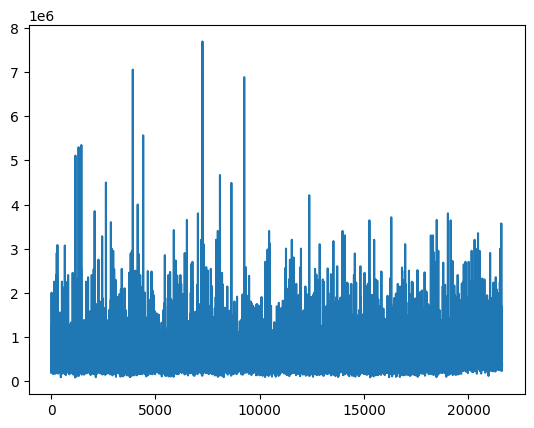

In [5]:
import matplotlib.pyplot as plt
plt.plot(raw_housing_data['Sale Price'])

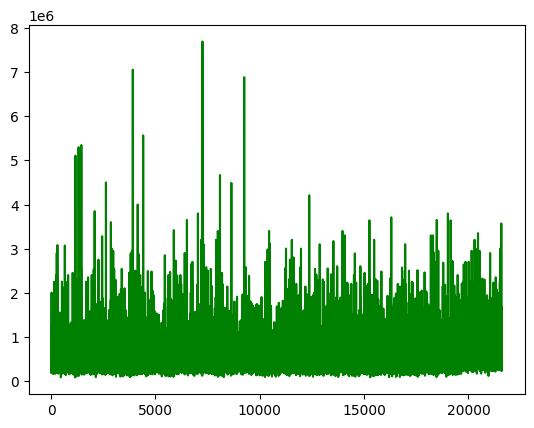

In [6]:
plt.plot(raw_housing_data['Sale Price'],color = 'green')

<function matplotlib.pyplot.show(close=None, block=None)>

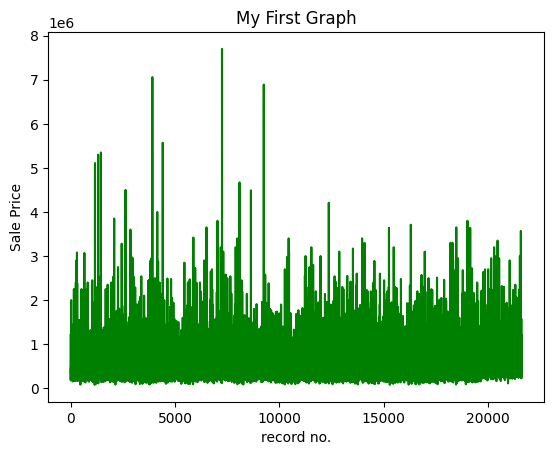

In [7]:
plt.plot(raw_housing_data['Sale Price'],color = 'green')
plt.xlabel("record no.")
plt.ylabel("Sale Price")
plt.title("My First Graph")
plt.show

labelled graph representation


representaion of pie graph

In [8]:
raw_housing_data.groupby('Condition of the House')['ID'].count()

Condition of the House
Bad             30
Excellent     1701
Fair         14031
Good          5679
Okay           172
Name: ID, dtype: int64

In [14]:
values = (30,1701,14031,5679,172)

In [18]:
labels=('Bad','Excellent','Fair','Good','Okay')

([<matplotlib.patches.Wedge at 0x79e9052d8fd0>,
 [Text(1.099989541385049, 0.004796753434368107, 'Bad'),
  Text(1.0641591373844368, 0.27850553014475643, 'Excellent'),
  Text(-0.9085709380486652, 0.620079713047741, 'Fair'),
  Text(0.7046888223897579, -0.8446381850229934, 'Good'),
  Text(1.0996562341282203, -0.02749848619362501, 'Okay')])

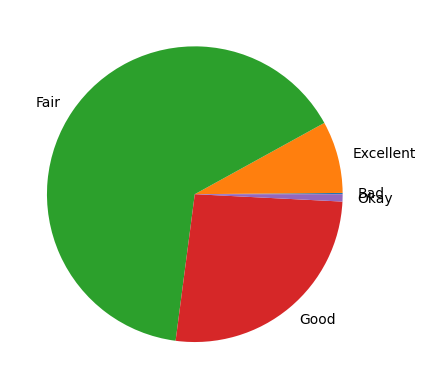

In [20]:
plt.pie(values,labels=labels)

<BarContainer object of 5 artists>

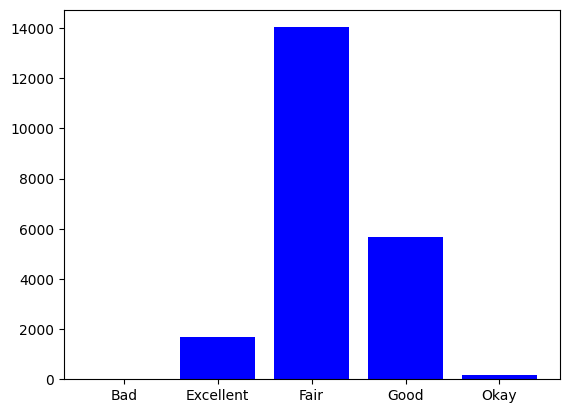

In [21]:
plt.bar(labels,values,color='Blue')

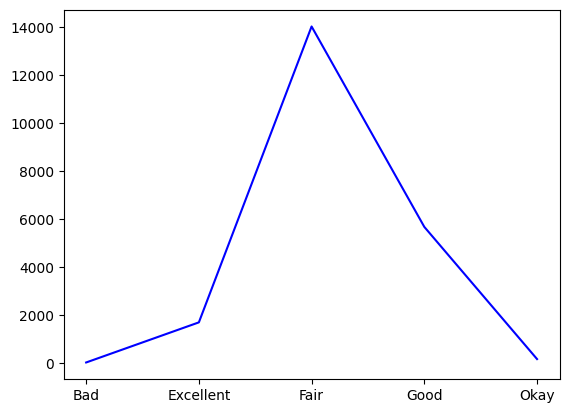

In [22]:
plt.plot(labels,values,color='Blue')

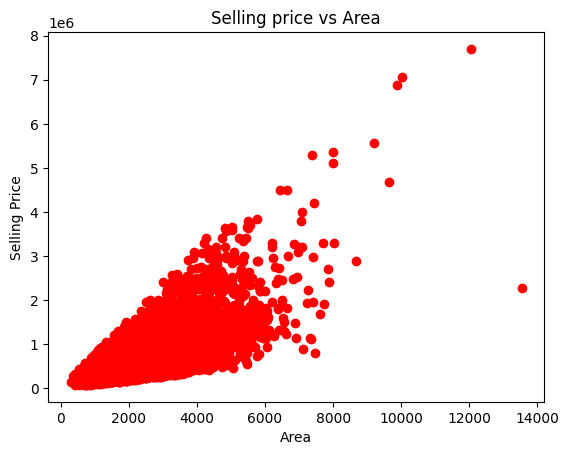

In [27]:
plt.scatter(x=raw_housing_data['Flat Area (in Sqft)'],y=raw_housing_data['Sale Price'],color='red')
plt.xlabel("Area")
plt.ylabel("Selling Price")
plt.title("Selling price vs Area")
plt.show()


this is the representation of scatter plot

(array([3592., 2663., 2784., 2525., 3218., 2587., 1361., 1079.,  952.,
         852.]),
 array([  3. ,  14.5,  26. ,  37.5,  49. ,  60.5,  72. ,  83.5,  95. ,
        106.5, 118. ]),
 <BarContainer object of 10 artists>)

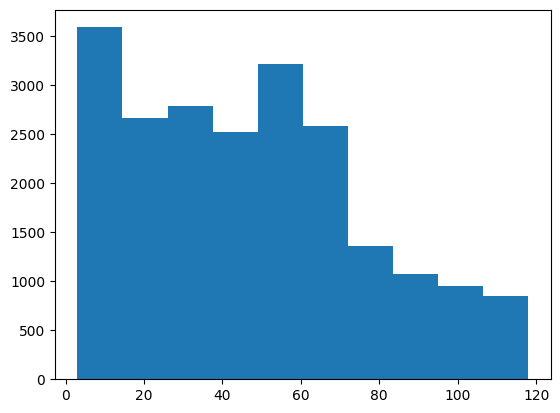

In [28]:
plt.hist(raw_housing_data['Age of House (in Years)'],bins = 10)

this is the representaion of the histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x79e905706a50>,
 'caps': [<matplotlib.lines.Line2D at 0x79e9049e40d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79e9049d6090>],
 'medians': [<matplotlib.lines.Line2D at 0x79e9049e5650>],
 'fliers': [<matplotlib.lines.Line2D at 0x79e9049d7b90>],
 'means': []}

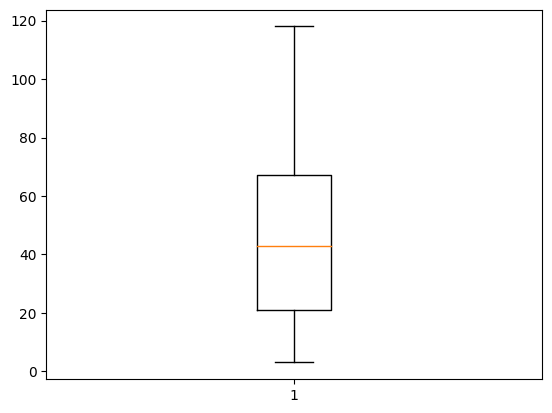

In [30]:
plt.boxplot(raw_housing_data['Age of House (in Years)'])

this is representation of the box plot for age of house in the regression data set


In [31]:
raw_housing_data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

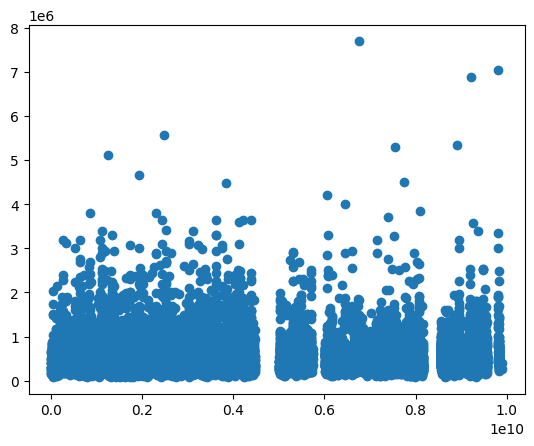

In [32]:
import matplotlib.pyplot as plt
plt.scatter(x=raw_housing_data['ID'],y=raw_housing_data['Sale Price'])



In [33]:
import seaborn as sns
